In [26]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras
from keras.models import load_model

In [2]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.summary()

# Compiling the CNN
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [27]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [4]:
# Training  and Saving Designed Model

batch_size = 1024
epochs = 100
checkpoint = keras.callbacks.ModelCheckpoint('Model{epoch:08d}.h5', period=1) 
history=classifier.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size=batch_size, epochs=epochs,callbacks=[checkpoint])
history

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 76s 1ms/step - loss: 0.4599 - accuracy: 0.8633 - val_loss: 0.1129 - val_accuracy: 0.9651
Epoch 2/100
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0904 - accuracy: 0.9723 - val_loss: 0.0870 - val_accuracy: 0.9715
Epoch 3/100
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0526 - val_accuracy: 0.9831
Epoch 4/100
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 5/100
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 6/100
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 7/100
60000/60000 [==============================] - 68s

Epoch 55/100
60000/60000 [==============================] - 68s 1ms/step - loss: 3.0431e-04 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9895
Epoch 56/100
60000/60000 [==============================] - 68s 1ms/step - loss: 4.3278e-04 - accuracy: 0.9998 - val_loss: 0.0872 - val_accuracy: 0.9909
Epoch 57/100
60000/60000 [==============================] - 67s 1ms/step - loss: 6.9742e-04 - accuracy: 0.9998 - val_loss: 0.0774 - val_accuracy: 0.9904
Epoch 58/100
60000/60000 [==============================] - 67s 1ms/step - loss: 3.4699e-06 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9910
Epoch 59/100
60000/60000 [==============================] - 68s 1ms/step - loss: 7.2111e-04 - accuracy: 0.9999 - val_loss: 0.0782 - val_accuracy: 0.9909
Epoch 60/100
60000/60000 [==============================] - 68s 1ms/step - loss: 5.6917e-06 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9919
Epoch 61/100
60000/60000 [==============================] - 68s 1ms/step - loss: 8

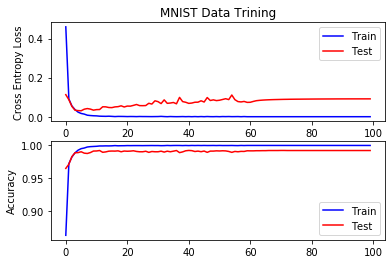

In [5]:
# Plotting of Training and Validation Curves (Figure 5.7)
'''The output of model.fit is a model.History object which is a record of metrics at each epoch. This can be used to graph the training and validation accuracy
to see where they plateaued off and if overfitting can subsequently be avoided'''
from matplotlib import pyplot
import sys
# plot loss
pyplot.subplot(211)
pyplot.ylabel('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue',label="Train")
pyplot.plot(history.history['val_loss'], color='red', label='Test')
pyplot.title("MNIST Data Trining")
pyplot.legend()
# plot accuracy
pyplot.subplot(212)
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='Train')
pyplot.plot(history.history['val_accuracy'], color='red', label='Test')
pyplot.legend()

In [6]:
# Information Theoretic Quantities Calculation Functions
def entropy(Y):
    """
    Also known as Shanon Entropy
    Reference: https://en.wikipedia.org/wiki/Entropy_(information_theory)
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en


#Joint Entropy
def jEntropy(Y,X):
    """
    H(Y;X)
    Reference: https://en.wikipedia.org/wiki/Joint_entropy
    """
    YX = np.concatenate((Y,X), axis=0)
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    """
    conditional entropy = Joint Entropy - Entropy of X
    H(Y|X) = H(Y;X) - H(X)
    Reference: https://en.wikipedia.org/wiki/Conditional_entropy
    """
    return jEntropy(Y, X) - entropy(X)


#Information Gain
def gain(Y, X):
    """
    Information Gain, I(Y;X) = H(Y) - H(Y|X)
    Reference: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees#Formal_definition
    """
    return entropy(Y) - cEntropy(Y,X)


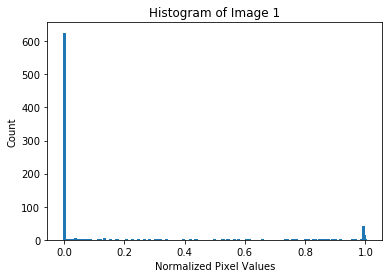

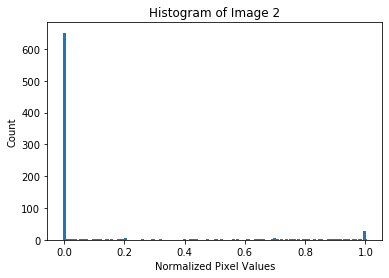

NameError: name 'entropy' is not defined

In [25]:
# Plotting histogram of randomly selected images (Figures 5.11 and 5.12)
a=x_train[150]
b=x_train[160]
unique, count = np.unique(a.flatten(), return_counts=True, axis=0)
x,y= np.unique(b.flatten(), return_counts=True, axis=0)
#prob = count/len(a.flatten())
plt.figure()

plt.bar(unique,count,width=0.01)
plt.xlabel("Normalized Pixel Values")
plt.ylabel("Count")
plt.title(f"Histogram of Image 1")
plt.figure()
plt.bar(x,y,width=0.01)
plt.xlabel("Normalized Pixel Values")
plt.ylabel("Count")
plt.title(f"Histogram of Image 2")
plt.show()

# Printing Information Thoeretic Calculations of Images ( Table 5.5)

print("Entropy of Image 1, H(X): ",entropy(a.flatten()))
print("Entropy of Image 2, H(Y): ",entropy(b.flatten()))
print("Mutual Information of Images, I(X;Y): ",gain(a.flatten(),b.flatten()))
print("Conditional Entropy of Images, H(X|Y) : ",cEntropy(a.flatten(),b.flatten()))
print("Conditional Entropy of Images, H(Y|X) : ",cEntropy(b.flatten(),a.flatten()))
print("Joint Entropy of Images, H(X,Y): ",jEntropy(a.flatten(),b.flatten()))

In [7]:
from keras.models import load_model
## Loading the saved weights of 5th epoch to the new model
from keras.models import load_model
## Loading the saved weights of 5th epoch to the new model
Model1=load_model("Model00000001.h5")
Model2=load_model("Model00000002.h5")
Model3=load_model("Model00000003.h5")
Model4=load_model("Model00000004.h5")
Model5=load_model("Model00000005.h5")
Model6=load_model("Model00000006.h5")
Model7=load_model("Model00000007.h5")
Model8=load_model("Model00000008.h5")
Model9=load_model("Model00000009.h5")
Model10=load_model("Model00000010.h5")
Model11=load_model("Model00000011.h5")
Model12=load_model("Model00000012.h5")
Model13=load_model("Model00000013.h5")
Model14=load_model("Model00000014.h5")
Model15=load_model("Model00000015.h5")
Model16=load_model("Model00000016.h5")
Model17=load_model("Model00000017.h5")
Model18=load_model("Model00000018.h5")
Model19=load_model("Model00000019.h5")
Model20=load_model("Model00000020.h5")
Model21=load_model("Model00000021.h5")
Model22=load_model("Model00000022.h5")
Model23=load_model("Model00000023.h5")
Model24=load_model("Model00000024.h5")
Model25=load_model("Model00000025.h5")
Model26=load_model("Model00000026.h5")
Model27=load_model("Model00000027.h5")
Model28=load_model("Model00000028.h5")
Model29=load_model("Model00000029.h5")
Model30=load_model("Model00000030.h5")
Model31=load_model("Model00000031.h5")
Model32=load_model("Model00000032.h5")
Model33=load_model("Model00000033.h5")
Model34=load_model("Model00000034.h5")
Model35=load_model("Model00000035.h5")
Model36=load_model("Model00000036.h5")
Model37=load_model("Model00000037.h5")
Model38=load_model("Model00000038.h5")
Model39=load_model("Model00000039.h5")
Model40=load_model("Model00000040.h5")
Model41=load_model("Model00000041.h5")
Model42=load_model("Model00000042.h5")
Model43=load_model("Model00000043.h5")
Model44=load_model("Model00000044.h5")
Model45=load_model("Model00000045.h5")
Model46=load_model("Model00000046.h5")
Model47=load_model("Model00000047.h5")
Model48=load_model("Model00000048.h5")
Model49=load_model("Model00000049.h5")
Model50=load_model("Model00000050.h5")
Model51=load_model("Model00000051.h5")
Model52=load_model("Model00000052.h5")
Model53=load_model("Model00000053.h5")
Model54=load_model("Model00000054.h5")
Model55=load_model("Model00000055.h5")
Model56=load_model("Model00000056.h5")
Model57=load_model("Model00000057.h5")
Model58=load_model("Model00000058.h5")
Model59=load_model("Model00000059.h5")
Model60=load_model("Model00000060.h5")
Model61=load_model("Model00000061.h5")
Model62=load_model("Model00000062.h5")
Model63=load_model("Model00000063.h5")
Model64=load_model("Model00000064.h5")
Model65=load_model("Model00000065.h5")
Model66=load_model("Model00000056.h5")
Model67=load_model("Model00000057.h5")
Model68=load_model("Model00000068.h5")
Model69=load_model("Model00000069.h5")
Model70=load_model("Model00000070.h5")
Model71=load_model("Model00000071.h5")
Model72=load_model("Model00000072.h5")
Model73=load_model("Model00000073.h5")
Model74=load_model("Model00000074.h5")
Model75=load_model("Model00000075.h5")
Model76=load_model("Model00000076.h5")
Model77=load_model("Model00000077.h5")
Model78=load_model("Model00000078.h5")
Model79=load_model("Model00000079.h5")
Model80=load_model("Model00000080.h5")
Model81=load_model("Model00000081.h5")
Model82=load_model("Model00000082.h5")
Model83=load_model("Model00000083.h5")
Model84=load_model("Model00000084.h5")
Model85=load_model("Model00000085.h5")
Model86=load_model("Model00000086.h5")
Model87=load_model("Model00000087.h5")
Model88=load_model("Model00000088.h5")
Model89=load_model("Model00000089.h5")
Model90=load_model("Model00000090.h5")
Model91=load_model("Model00000091.h5")
Model92=load_model("Model00000092.h5")
Model93=load_model("Model00000093.h5")
Model94=load_model("Model00000094.h5")
Model95=load_model("Model00000095.h5")
Model96=load_model("Model00000096.h5")
Model97=load_model("Model00000097.h5")
Model98=load_model("Model00000098.h5")
Model99=load_model("Model00000099.h5")
Model100=load_model("Model00000100.h5")

In [8]:
# Plotting Mutual Information Between Input and Output I(X;T), output and labels I(Y;T) (Figure 6.2)
images=x_train[0:1000]
Model_list=[Model1,Model2,Model3,Model4,Model5,Model6,
            Model7,Model8,Model9,Model10,Model11,Model12,Model13,
            Model14,Model15,Model16,Model17,Model18,Model19,Model20,Model25,
            Model30,Model35,Model40,Model45,Model50,Model55,Model60,Model65,
            Model70,Model75,Model80,Model85,Model90,Model95,Model100]
foutputs=[]
for i,model in enumerate(Model_list):
    layer_outputs=[layer.output for layer in model.layers[:]]
    activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
    foutputs.append(activation_model.predict(images))

#Mutual Information Between Input and Output , Output and Label 

I_YT=[] #I(T;Y)
I_XT=[] #I(X;T)
for i in range(len(foutputs)):
    I_YT.append(gain(foutputs[i][5].flatten(),y_train[0:1000].flatten()))
    I_XT.append(gain(images.flatten(),foutputs[i][5].flatten()))

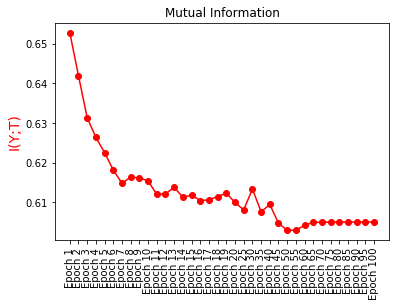

In [10]:
fig,ax = plt.subplots()
# make a plot
ax.plot(range(len(Model_list)), I_YT, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("Training Epochs",fontsize=14)
# set y-axis label
ax.set_ylabel("I(Y;T)",color="red",fontsize=14)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
              30,31,32,33,34,35])
ax.set_xticklabels(['Epoch 1','Epoch 2','Epoch 3','Epoch 4','Epoch 5','Epoch 6','Epoch 7','Epoch 8','Epoch 9','Epoch 10',
                    'Epoch 11','Epoch 12','Epoch 13','Epoch 14','Epoch 15','Epoch 16','Epoch 17','Epoch 18',
                   'Epoch 19','Epoch 20',"Epoch 25","Epoch 30","Epoch 35","Epoch 40","Epoch 45","Epoch 50","Epoch 55",
                    "Epoch 60","Epoch 65","Epoch 70","Epoch 75","Epoch 80","Epoch 85","Epoch 90","Epoch 95","Epoch 100"],rotation = 90)


plt.title("Mutual Information")
plt.show()

In [ ]:
# Plotting Mutual Information ALong the Layers (Figure 6.1-a)
""" 
These quantities calculated by assumption of I(X;T)=H(T) where T is a deterministic function of X.
"""
images=x_train[0:1000]
Model_list=[Model1,Model5,Model10,
            Model15,Model20]
outputs=[]
for i,model in enumerate(Model_list):
    layer_outputs=[layer.output for layer in model.layers[:]]
    activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
    outputs.append(activation_model.predict(images))

entropi=[]

for i,model in enumerate(outputs):# i:0-5
    layerentropi=[]
    for j in range(len(outputs[0])): #j:0-8
        layerentropi.append(entropy(outputs[i][j].flatten()))
    entropi.append(layerentropi)

xlist=[1,2,3,4,5,6,7,8,9]

plt.plot(xlist,entropi[0], )
plt.plot(xlist,entropi[1], )
plt.plot(xlist,entropi[2], )
plt.plot(xlist,entropi[3], )
plt.plot(xlist,entropi[4], )
plt.scatter(xlist,entropi[0], label="Epoch 1")
plt.scatter(xlist,entropi[1], label="Epoch 5")
plt.scatter(xlist,entropi[2], label="Epoch 10")
plt.scatter(xlist,entropi[3], label="Epoch 15")
plt.scatter(xlist,entropi[4], label="Epoch 20")


plt.title("Mutual Information- I(X;T)")
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(["Conv1","Conv2","MaxPool1","Conv3","Conv4","MaxPool2","Flatten","Dense","Output Layer"],rotation = 90)
plt.legend()
plt.show()

In [ ]:
# Plotting Mutual Information Between Input and Output I(X;T), output and labels I(Y;T) (Figure 6.2)
images=x_train[0:1000]
Model_list=[Model1,Model2,Model3,Model4,Model5,Model6,
            Model7,Model8,Model9,Model10,Model11,Model12,Model13,
            Model14,Model15,Model16,Model17,Model18,Model19,Model20,Model25,
            Model30,Model35,Model40,Model45,Model50,Model55,Model60,Model65,
            Model70,Model75,Model80,Model85,Model90,Model95,Model100]
foutputs=[]
for i,model in enumerate(Model_list):
    layer_outputs=[layer.output for layer in model.layers[:]]
    activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
    foutputs.append(activation_model.predict(images))

#Mutual Information Between Input and Output , Output and Label 

I_YT=[] #I(T;Y)
I_XT=[] #I(X;T)
for i in range(len(foutputs)):
    I_YT.append(gain(foutputs[i][8].flatten(),y_train[0:100].flatten()))
    I_XT.append(gain(images.flatten(),foutputs[i][8].flatten()))


fig,ax = plt.subplots()
# make a plot
ax.plot(range(len(Model_list)), I_XT, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("Training Epochs",fontsize=14)
# set y-axis label
ax.set_ylabel("I(X;T)",color="red",fontsize=14)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
              30,31,32,33,34,35])
ax.set_xticklabels(['Epoch 1','Epoch 2','Epoch 3','Epoch 4','Epoch 5','Epoch 6','Epoch 7','Epoch 8','Epoch 9','Epoch 10',
                    'Epoch 11','Epoch 12','Epoch 13','Epoch 14','Epoch 15','Epoch 16','Epoch 17','Epoch 18',
                   'Epoch 19','Epoch 20',"Epoch 25","Epoch 30","Epoch 35","Epoch 40","Epoch 45","Epoch 50","Epoch 55",
                    "Epoch 60","Epoch 65","Epoch 70","Epoch 75","Epoch 80","Epoch 85","Epoch 90","Epoch 95","Epoch 100"],rotation = 90)


plt.title("Mutual Information")
plt.show()